In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Model performance metrics
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image

In [45]:
# Define dataset and model parameters
dataset_path = './PlantVillage'

#Model Parameters
num_classes = 3
input_shape = (256, 256, 3)
batch_size = 32
epochs = 50

**Data Augmentation**

In [4]:
# Create a data generator for data augmentation
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

**preprocess the dataset**

In [6]:
# Train dataset
train_dataset = data_generator.flow_from_directory(
    dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 1722 images belonging to 3 classes.


In [7]:
# Validation dataset
validation_dataset = data_generator.flow_from_directory(
    dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 430 images belonging to 3 classes.


**Data Visualization**

In [37]:
class_names = ["Potato___Early_blight", "Potato___healthy", "Potato___Late_blight"]
rows = 4
columns = 4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

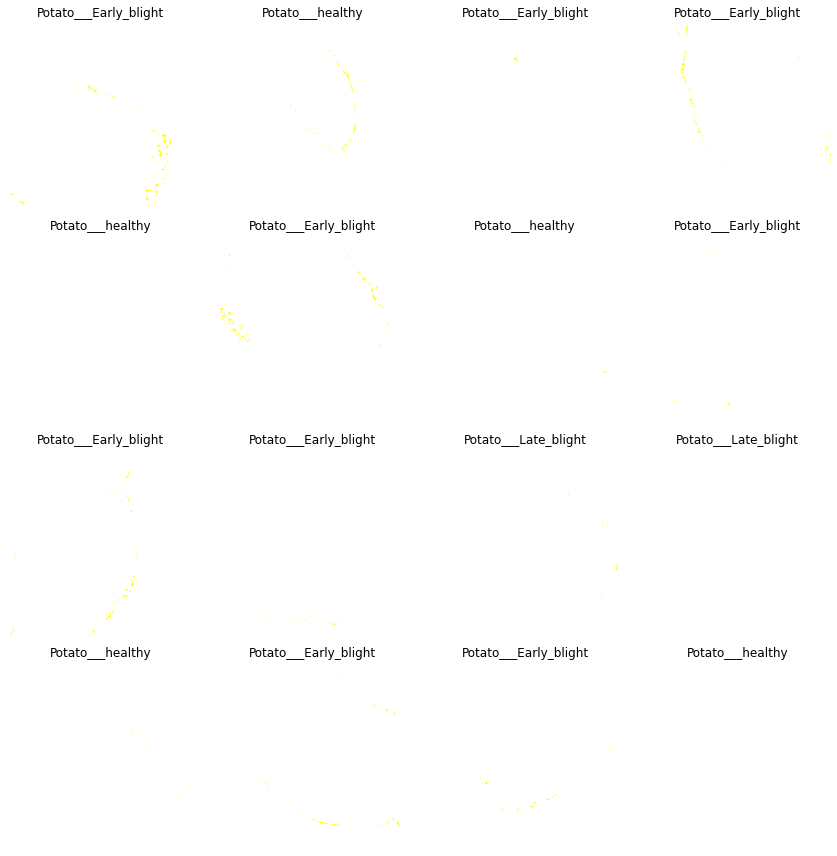

In [40]:
# Visualize a batch of sample images from the dataset (before data splitting)
plt.figure(figsize=(12, 12))
for i in range(min(len(train_dataset[0][0]), 16)):  #display up to 16 subplots
    plt.subplot(rows, columns, i + 1)
    plt.imshow(train_dataset[0][0][i])
    label_index = train_dataset[0][1][i].argmax()
    plt.title(class_names[label_index])
    plt.axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


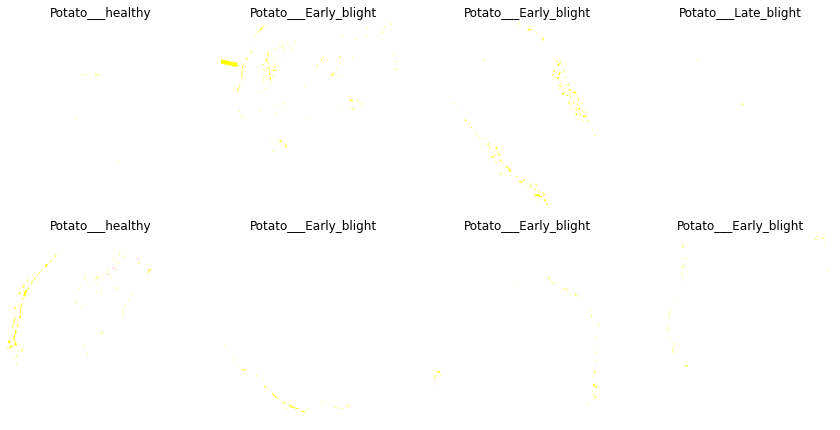

In [41]:
plt.figure(figsize=(12, 12))
for i in range(min(len(validation_dataset[0][0]), 8)):  #display up to 16 subplots
    plt.subplot(rows, columns, i + 1)
    plt.imshow(validation_dataset[0][0][i])
    label_index = validation_dataset[0][1][i].argmax()
    plt.title(class_names[label_index])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_dataset[0][0], train_dataset[0][1], test_size=0.2, random_state=42)

**Build the ANN Model**

In [46]:
# Create the ANN model
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [47]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/50
54/54 [==============================] - 149s 3s/step - loss: 33.3959 - accuracy: 0.6156 - val_loss: 0.8364 - val_accuracy: 0.6907
Epoch 2/50
54/54 [==============================] - 135s 2s/step - loss: 0.7639 - accuracy: 0.7300 - val_loss: 0.8969 - val_accuracy: 0.6930
Epoch 3/50
54/54 [==============================] - 131s 2s/step - loss: 1.1740 - accuracy: 0.6986 - val_loss: 0.7909 - val_accuracy: 0.7116
Epoch 4/50
54/54 [==============================] - 120s 2s/step - loss: 0.7266 - accuracy: 0.7294 - val_loss: 0.6476 - val_accuracy: 0.7721
Epoch 5/50
54/54 [==============================] - 130s 2s/step - loss: 0.6604 - accuracy: 0.7520 - val_loss: 0.5756 - val_accuracy: 0.7977
Epoch 6/50
54/54 [==============================] - 131s 2s/step - loss: 0.6219 - accuracy: 0.7718 - val_loss: 0.7255 - val_accuracy: 0.6977
Epoch 7/50
54/54 [==============================] - 134s 2s/step - loss: 0.6032 - accuracy: 0.7846 - val_loss: 0.6684 - val_accuracy: 0.7744
Epoch 8/50
5

In [49]:
#View Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

***Train and Evaluate the Model***

In [50]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

14/14 [==============================] - 10s 717ms/step - loss: 0.4436 - accuracy: 0.8442
Validation Loss: 0.4436, Validation Accuracy: 0.8442


In [51]:
# Evaluate the model on the testing dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {:.2f}%'.format(test_loss * 100))
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

1/1 [==============================] - 0s 214ms/step - loss: 0.0538 - accuracy: 1.0000
Test Loss: 5.38%
Test Accuracy: 100.00%


**Data Visulization After Train and Evaluate the Model**

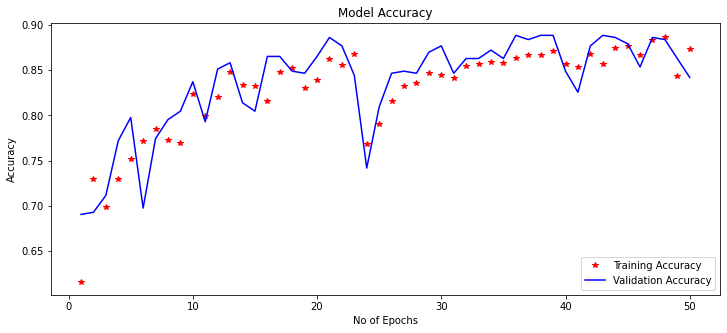

In [57]:
# Accuracy plot graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.plot(epochs, acc, 'r*', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

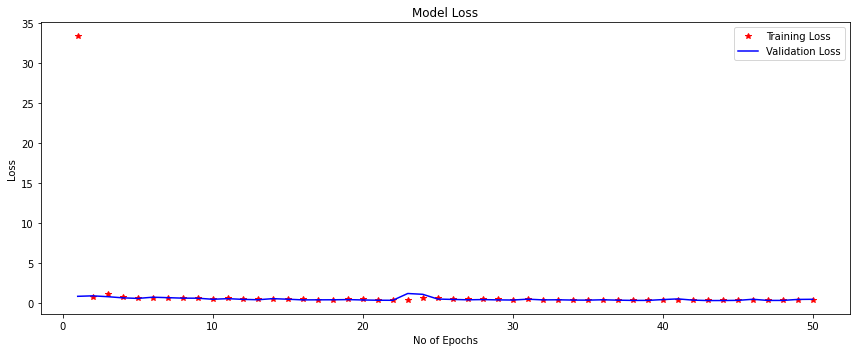

In [58]:
# Loss plot graph
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'r*', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('./ann_accuracy_loss_plot.png')
plt.show()

In [82]:
# Predicted values
y_pred = model.predict(validation_dataset)

14/14 [==============================] - 11s 733ms/step


In [83]:
# Decode predicted labels
y_pred = tf.argmax(y_pred, axis=1).numpy()

In [84]:
# Generate and print the classification report
report = classification_report(
    validation_dataset.classes,
    y_pred,
    target_names=class_names
)
print(report)

                       precision    recall  f1-score   support

Potato___Early_blight       0.43      0.51      0.47       200
     Potato___healthy       0.42      0.40      0.41       200
 Potato___Late_blight       0.25      0.03      0.06        30

             accuracy                           0.43       430
            macro avg       0.37      0.31      0.31       430
         weighted avg       0.41      0.43      0.41       430



In [110]:
# Save the trained model
model.save("potatoDiseaseANN.h5")

C:\Users\mmjes\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Load the trained model**
Run the code from here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
# Load the trained model
model = keras.models.load_model("../Models/potatoDiseaseANN.h5")

In [123]:
# Load and preprocess a test image
image_path = './PlantVillage/Potato___Early_blight/22b28f50-4141-4ca7-be3f-ccb1c521c2df___RS_Early.B 8285.JPG'
image = keras.preprocessing.image.load_img(
    image_path, target_size=(256, 256)
)
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch

# Predict the class of the test image
predictions = model.predict(input_arr)
predicted_class = np.argmax(predictions)

1/1 [==============================] - 0s 88ms/step


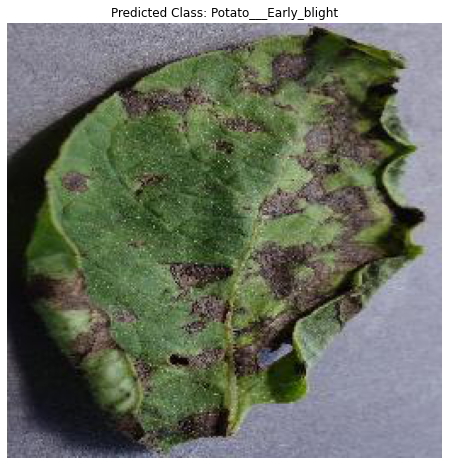

In [124]:
# Display the test image and predicted class
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f"Predicted Class: {class_names[predicted_class]}")
plt.axis("off")
plt.show()